# Objective

Identify opportunities to increase occupancy rate on low performing flights which can ultimately lead to increased profitablity.

# Import Libraries

In [1]:
import sqlite3
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sa
import pandas as pd
import seaborn as sns

# Connet to database

In [2]:
engine=sa.create_engine(r'sqlite+pysqlite:////Users/anishachoudhury/Desktop/Projects/portfolio1/airlines/travel.sqlite')
connection=engine.connect()

# Data exploration

In [22]:
pd.read_sql_query("""SELECT name FROM sqlite_master WHERE type='table'""",connection)

,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


In [4]:
aircrafts_data = pd.read_sql_query('select * from aircrafts_data', connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data = pd.read_sql_query('select * from airports_data', connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
boarding_passes = pd.read_sql_query('select * from boarding_passes', connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [8]:
bookings = pd.read_sql_query('select * from bookings', connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [9]:
flights = pd.read_sql_query('select * from flights', connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [10]:
seats = pd.read_sql_query('select * from seats', connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [11]:
ticket_flights = pd.read_sql_query('select * from ticket_flights', connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [12]:
tickets = pd.read_sql_query('select * from tickets', connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


# Basic Analysis

How many planes have more than 100 seat?

In [13]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(*) as num_seat FROM SEATS 
GROUP BY aircraft_code
HAVING COUNT(seat_no)>100
ORDER BY num_seat DESC""", connection)

,aircraft_code,num_seat
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


How does the total amount of tickets booked and total amount earned changed with time?

In [15]:
ticket = sa.text('SELECT * FROM tickets INNER JOIN bookings USING (book_ref)')
tickets= pd.read_sql_query(ticket, con=connection)
tickets.head()

,ticket_no,book_ref,passenger_id,book_date,total_amount
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03,30900


In [16]:
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
date_count = tickets.groupby('date')[['date']].count()
tickets.head()

,ticket_no,book_ref,passenger_id,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03:00,30900,2017-07-03


Line graph: Number of tickets per year

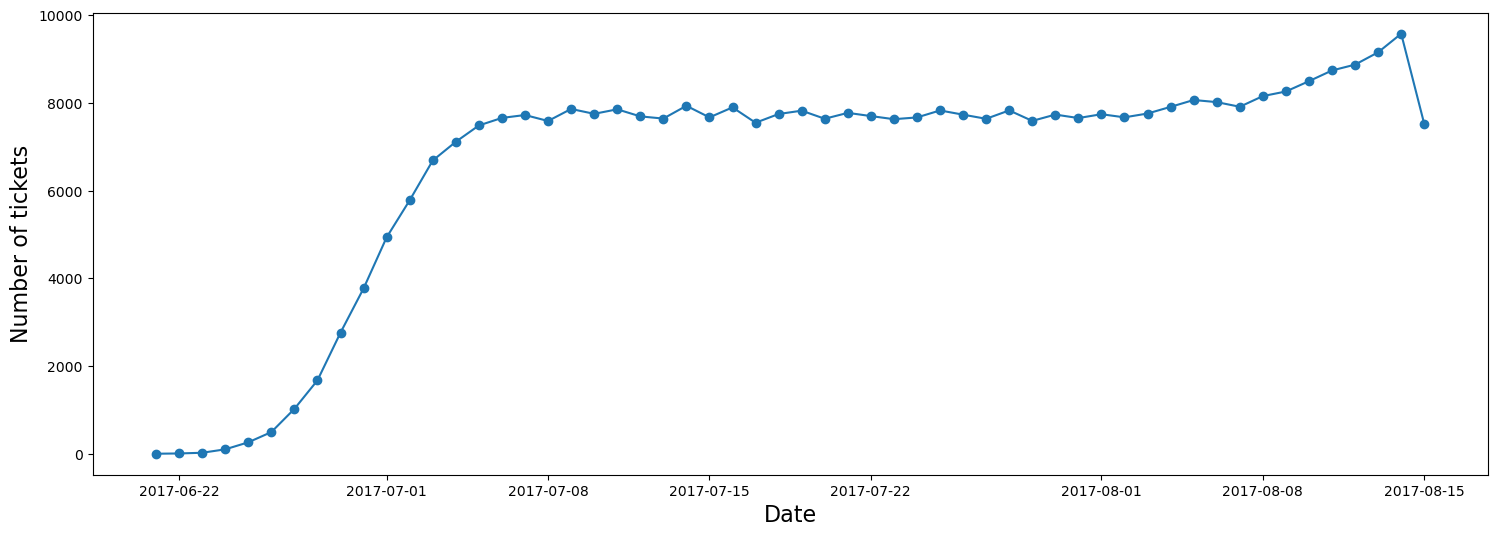

In [17]:
#Plot
plt.figure(figsize=(18,6))
plt.plot(date_count.index, date_count['date'], marker='o')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of tickets', fontsize=16)
plt.show()

How does the average amount change with different aircrafts fare conditions?

In [18]:
df = pd.read_sql_query('Select aircraft_code,fare_conditions, AVG(amount) as avg_amt from ticket_flights \
INNER JOIN flights USING (flight_id) GROUP BY aircraft_code, fare_conditions',connection)
df

,aircraft_code,fare_conditions,avg_amt
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg_amt'>

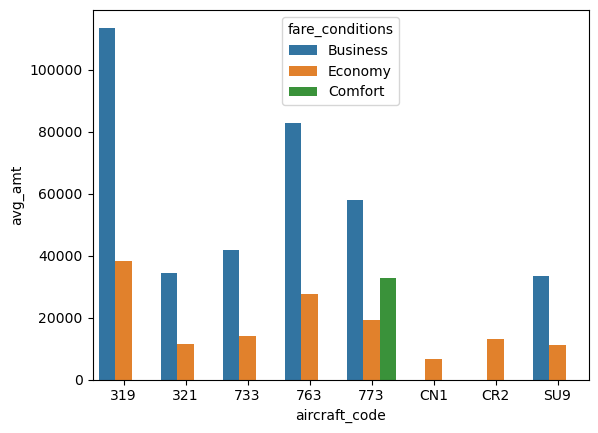

In [19]:
#plotting
sns.barplot(data=df, x='aircraft_code',y='avg_amt', hue='fare_conditions')

# Analyzing occupancy rate

For each aircraft calculate the total revenue per year and the average revenue per ticket

In [23]:
revenue = pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count from 
(select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights inner join
flights using (flight_id) group by aircraft_code)""",connection)
revenue

,aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


Calculate average occupancy per aircraft

In [26]:
# aircraft code, flight_id and seats_count for all the seats booked for diff aircrafts
pd.read_sql_query("""select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id""",connection)

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [27]:
#total number of seats
pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats group by aircraft_code""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [32]:
#merging seats booked and total num of seats to calc occupancy rate
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, 
avg(a.seats_count)/b.num_seats as occupancy_rate from (select aircraft_code, flights.flight_id, count(*) 
as seats_count 
from boarding_passes
inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id) as a 
inner join 
(select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b 
on a.aircraft_code=b.aircraft_code
group by a.aircraft_code""",connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


Calculate by how much the total annual turnover could increase by giving all airlines a 10% higher occupancy rate

In [33]:
occupancy_rate['Increased occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Increased occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [ ]:
#total revenue

In [36]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
inner join flights using (flight_id)
group by aircraft_code""",connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [38]:
#increased total annual turnover 
occupancy_rate['Incr total annual turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Increased occupancy rate,Incr total annual turnover
0,319,53.583181,116,0.461924,0.508116,2.706163e+09
1,321,88.809231,170,0.522407,0.574648,1.638164e+09
2,733,80.255462,130,0.617350,0.679085,1.426552e+09
3,763,113.937294,222,0.513231,0.564554,4.371277e+09
4,773,264.925806,402,0.659019,0.724921,3.431206e+09
5,CN1,6.004431,12,0.500369,0.550406,9.637380e+07
6,CR2,21.482847,50,0.429657,0.472623,1.982760e+09
7,SU9,56.812113,97,0.585692,0.644261,5.114485e+09
